## Initial SIR model

In [6]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
pd.options.display.float_format = '{:.0f}'.format 

### Loading data (22-03-2020)

In [7]:
ts_c = pd.read_csv("data/22_03/time_series_19-covid-Confirmed.csv")
ts_r = pd.read_csv("data/22_03/time_series_19-covid-Recovered.csv")
ts_d = pd.read_csv("data/22_03/time_series_19-covid-Deaths.csv")

### Generate a SIR model for Spain

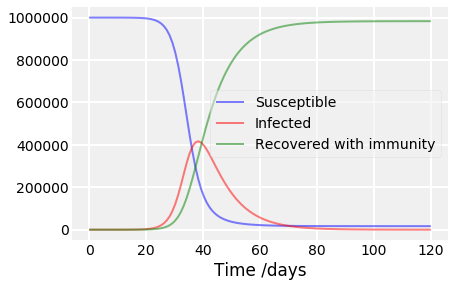

In [8]:
# Total population, N. (Assuming the susceptible population is 1 million people)
N = 1000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = .52, 1./8
# A grid of time points (in days)
t = np.linspace(0, 120, 120)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
# ax.set_xlim(0,90)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [9]:
ts_c_spain = ts_c[ts_c["Country/Region"]=="Spain"]
ts_c_spain_tidy = ts_c_spain.iloc[:,35:].T.rename(columns={18: "confirmed"})

ts_r_spain = ts_r[ts_r["Country/Region"]=="Spain"]
ts_r_spain_tidy = ts_r_spain.iloc[:,35:].T.rename(columns={18: "recovered"})

ts_d_spain = ts_d[ts_d["Country/Region"]=="Spain"]
ts_d_spain_tidy = ts_d_spain.iloc[:,35:].T.rename(columns={18: "deaths"})


In [10]:
spain_covid = pd.concat([ts_c_spain_tidy, ts_r_spain_tidy, ts_d_spain_tidy], axis=1, sort=False).reset_index()
spain_covid["infected"] = spain_covid["confirmed"] - spain_covid["recovered"] - spain_covid["deaths"]

In [11]:
spain_covid["daily_deaths"] = spain_covid["deaths"].diff()

In [12]:
spain_covid.tail()

,index,confirmed,recovered,deaths,infected,daily_deaths
26,3/19/20,17963,1107,830,16026,207
27,3/20/20,20410,1588,1043,17779,213
28,3/21/20,25374,2125,1375,21874,332
29,3/22/20,28768,2575,1772,24421,397
30,3/23/20,28768,2575,1772,24421,0


In [13]:
spain_covid_infected = spain_covid[["infected"]]

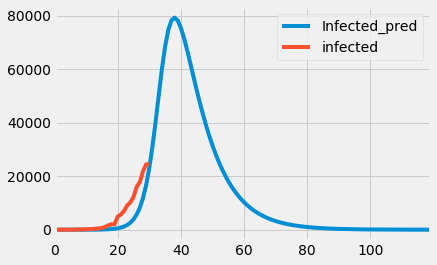

In [14]:
#Plotting Spain infected
#Infected reported 19% of total as Spain only test severe and critical cases.
infected_estimation = pd.DataFrame(I*0.19, columns=["Infected_pred"])
infected_estimation.iloc[:30,:]

combined = infected_estimation.merge(spain_covid_infected, left_index = True, right_index = True, how = 'left')


combined.plot()

(0, 25421.0)

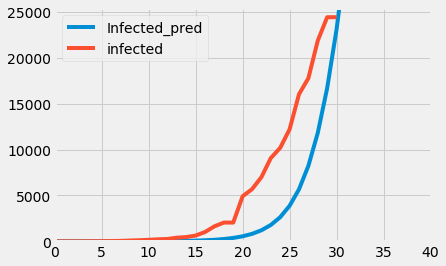

In [15]:
ax = combined.plot()
ax.set_xlim(0,40)
ax.set_ylim(0,max(combined["infected"]+1000))

In [16]:
combined[["Infected_pred", "infected"]].iloc[:60]

,Infected_pred,infected
0,0,0
1,0,0
2,0,0
3,1,4
4,1,11
5,1,13
6,2,30
7,3,43
8,5,82
9,7,118


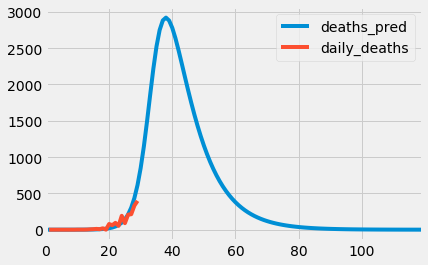

In [17]:
#Plotting Spain deaths
spain_covid_deaths = spain_covid.iloc[:30,:][["daily_deaths"]]

deaths_estimation = pd.DataFrame(I*0.007, columns=["deaths_pred"])

combined_d = deaths_estimation.merge(spain_covid_deaths, left_index = True, right_index = True, how = 'left')


combined_d.plot()

(0, 1397.0)

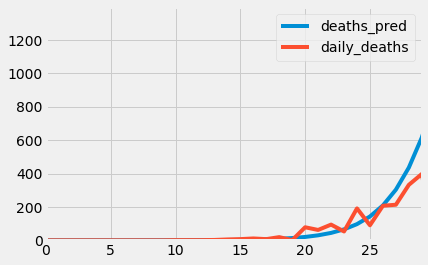

In [18]:
ax = combined_d.fillna(0).plot()
ax.set_xlim(0,29)
ax.set_ylim(0,max(combined_d["daily_deaths"].fillna(0)+1000))


In [19]:
combined_d[:40].fillna(0)

,deaths_pred,daily_deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
